## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
!nvidia-smi


Mon Jul 15 23:11:30 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.39       Driver Version: 418.39       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K20m          Off  | 00000000:05:00.0 Off |                  Off |
| N/A   41C    P0    44W / 225W |      0MiB /  5062MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [8]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [9]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 6s 111us/step - loss: 1.9455 - acc: 0.3015 - val_loss: 1.7719 - val_acc: 0.3598
Epoch 2/100
50000/50000 [==============================] - 5s 103us/step - loss: 1.7244 - acc: 0.3814 - val_loss: 1.6799 - val_acc: 0.3994
Epoch 3/100
50000/50000 [==============================] - 6s 112us/step - loss: 1.6257 - acc: 0.4207 - val_loss: 1.5892 - val_acc: 0.4357
Epoch 4/100
50000/50000 [==============================] - 6s 111us/step - loss: 1.5635 - acc: 0.4452 - val_loss: 1.5516 - val_acc: 0.4480
Epoch 5/100
50000/50000 [==============================] - 5s 104us/step - loss: 1.5137 - acc: 0.4607 - val_loss: 1.5294 - val_acc: 0.4565
Epoch 6/100
50000/50000 [==============================] - 5s 101us/step - loss: 1.4751 - acc: 0.4738 - val_loss: 1.5017 - val_acc: 0.4646
Epoch 7/100
50000/50000 [==============================] - 5s 106us/

50000/50000 [==============================] - 5s 96us/step - loss: 0.5472 - acc: 0.8030 - val_loss: 1.9403 - val_acc: 0.5181
Epoch 58/100
50000/50000 [==============================] - 5s 95us/step - loss: 0.5434 - acc: 0.8053 - val_loss: 1.9337 - val_acc: 0.5170
Epoch 59/100
50000/50000 [==============================] - 5s 98us/step - loss: 0.5361 - acc: 0.8067 - val_loss: 1.9800 - val_acc: 0.5129
Epoch 60/100
50000/50000 [==============================] - 5s 95us/step - loss: 0.5097 - acc: 0.8186 - val_loss: 1.9813 - val_acc: 0.5162
Epoch 61/100
50000/50000 [==============================] - 5s 99us/step - loss: 0.5191 - acc: 0.8135 - val_loss: 2.0055 - val_acc: 0.5154
Epoch 62/100
50000/50000 [==============================] - 5s 99us/step - loss: 0.5176 - acc: 0.8136 - val_loss: 2.0920 - val_acc: 0.5101
Epoch 63/100
50000/50000 [==============================] - 5s 100us/step - loss: 0.5021 - acc: 0.8199 - val_loss: 2.1191 - val_acc: 0.5074
Epoch 64/100
50000/50000 [=============

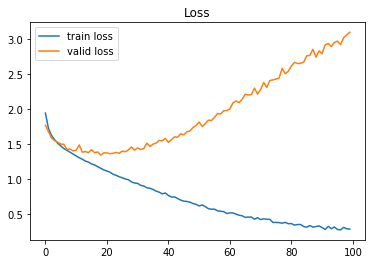

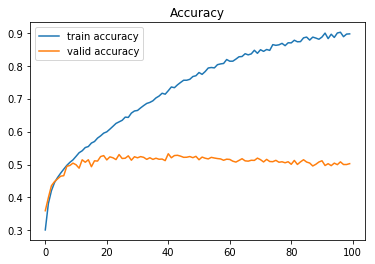

In [11]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()